# Rating Prediction

In [4]:
from IPython.display import Image
Image(url= "https://ebusinessinstitute.com/wp-content/uploads/2019/04/Ratings-and-Reviews-5-reasons-why-they-really-matter-Featured-Image-2048x912.png")

# 1.Introduction

#### Rating prediction is a well-known recommendation task aiming to predict a user's rating for those items which were not rated yet by her. 
#### Predictions are computed from users' explicit feedback, i.e. their ratings provided on some items in the past.
#### In this Project I have done Web Scraping by using Electronics goods that is phones,smart watches,headphones, laptops etc.
#### After completing Web scrappping and converting all the scrap data into Dataset.From which I understand from this dataset I have to predict Ratings_of_the_product.

# 2.Importing Necessary Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 3. Loading excel data

In [2]:
df = pd.read_excel('ratings_prediction.xlsx')
df.head()

,Product,Ratings_of_the_product,Full_review,Short_review
0,Professional Cameras,5,Well Reviewing this after using for almost one...,Great product
1,Professional Cameras,5,Worth more than the amount. Best DSLR for a go...,Just wow!
2,Professional Cameras,5,product really great . I am totally sctified t...,Excellent
3,Professional Cameras,4,The camera simply awesome..and it is a best bu...,Worth the money
4,Professional Cameras,3,Satisfied with the product.. Its a really good...,Does the job


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that Price is thelabel columns while remaning are the Features columns.

# 4. EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.¶

In [7]:
# Using shape
df.shape

(20956, 4)

#### By using shape I got 20956 rows and 4 columns.

In [8]:
df.Ratings_of_the_product.value_counts()

5    11898
4     4007
1     2791
3     1565
2      695
Name: Ratings_of_the_product, dtype: int64

#### From the above code 5 star reviews are most demanded.

In [9]:
# Length
df['length'] = df.Full_review.str.len()
df['length1'] = df.Short_review.str.len()
df.head()

,Product,Ratings_of_the_product,Full_review,Short_review,length,length1
0,Professional Cameras,5,Well Reviewing this after using for almost one...,Great product,177.0,13
1,Professional Cameras,5,Worth more than the amount. Best DSLR for a go...,Just wow!,133.0,9
2,Professional Cameras,5,product really great . I am totally sctified t...,Excellent,245.0,9
3,Professional Cameras,4,The camera simply awesome..and it is a best bu...,Worth the money,134.0,15
4,Professional Cameras,3,Satisfied with the product.. Its a really good...,Does the job,128.0,12


#### By using len Full_review & Short_review shows the length of features columns.

In [10]:
# convert all features to lower case
df['Full_review'] = df['Full_review'].str.lower()
df['Short_review'] = df['Short_review'].str.lower()
df.head()

,Product,Ratings_of_the_product,Full_review,Short_review,length,length1
0,Professional Cameras,5,well reviewing this after using for almost one...,great product,177.0,13
1,Professional Cameras,5,worth more than the amount. best dslr for a go...,just wow!,133.0,9
2,Professional Cameras,5,product really great . i am totally sctified t...,excellent,245.0,9
3,Professional Cameras,4,the camera simply awesome..and it is a best bu...,worth the money,134.0,15
4,Professional Cameras,3,satisfied with the product.. its a really good...,does the job,128.0,12


#### All features are converted into lower case

In [11]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20956 entries, 0 to 20955
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product                 20956 non-null  object 
 1   Ratings_of_the_product  20956 non-null  int64  
 2   Full_review             20954 non-null  object 
 3   Short_review            20956 non-null  object 
 4   length                  20954 non-null  float64
 5   length1                 20956 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 982.4+ KB


#### Also, most of the column are object in nature and Ratings_of_the_product,length1 is of int64 data type.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(17042, 6)

#### After using dupllicates I can see there is duplicates value in this dataset.

In [15]:
df.nunique()

Product                       8
Ratings_of_the_product        5
Full_review               12257
Short_review               1681
length                      483
length1                     337
dtype: int64

#### By Using nunique I got an idea of continuous & Categorical Columns.
#### As in this Dataset most of the columns are continuous to predict Ratings Prediction.

In [16]:
df.describe()

,Ratings_of_the_product,length,length1
count,17042.000000,17041.000000,17042.000000
mean,3.931463,69.269820,21.125807
std,1.460791,98.890004,45.791254
min,1.000000,2.000000,1.000000
25%,3.000000,13.000000,9.000000
50%,5.000000,29.000000,13.000000
75%,5.000000,79.000000,17.000000
max,5.000000,500.000000,500.000000


# Data Visualizations

##### Ratings_of_the_product

In [12]:
df['Ratings_of_the_product'].value_counts()

5    9238
4    3214
1    2584
3    1358
2     648
Name: Ratings_of_the_product, dtype: int64

#### Donut_Charts

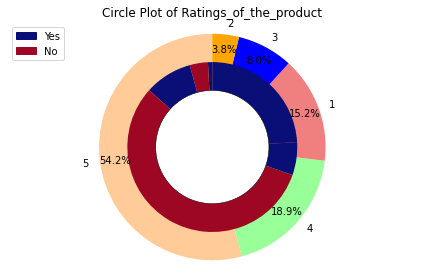

In [14]:
labels = ['5', '4', '1', '3', '2']
sizes = [9238, 3214, 2584, 1358, 648]
labels_attrition = ['Yes','No','Yes','No','Yes']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ffcc99', '#99ff99', 'Lightcoral', 'blue', 'orange', 'red']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of Ratings_of_the_product')
plt.tight_layout()
plt.show()

### pie plot

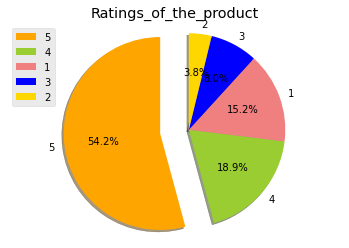

In [16]:
#  pie plot of malignant 

labels = ['5', '4', '1', '3', '2']
value = [9238, 3214, 2584, 1358, 648]
colors = ['orange','yellowgreen','Lightcoral', 'blue', 'gold']
explode = [0.3,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Ratings_of_the_product')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

### count_plot

<AxesSubplot:xlabel='Ratings_of_the_product', ylabel='count'>

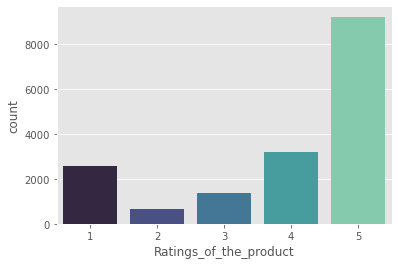

In [17]:
sns.countplot(df['Ratings_of_the_product'],palette='mako', data=df)

#### From the Above Plots of Ratings_of_the_product it shows 5 ratings reviews are most used for ratings predictions.

# Correlation

In [17]:
df.corr()

,Ratings_of_the_product,length,length1
Ratings_of_the_product,1.000000,-0.047472,-0.018370
length,-0.047472,1.000000,-0.094703
length1,-0.018370,-0.094703,1.000000


### HeatMap

#### Heatmap is a way to show some sort of matrix plot.
#### To use a heatmap the data should be in a matrix form.
#### By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

[]

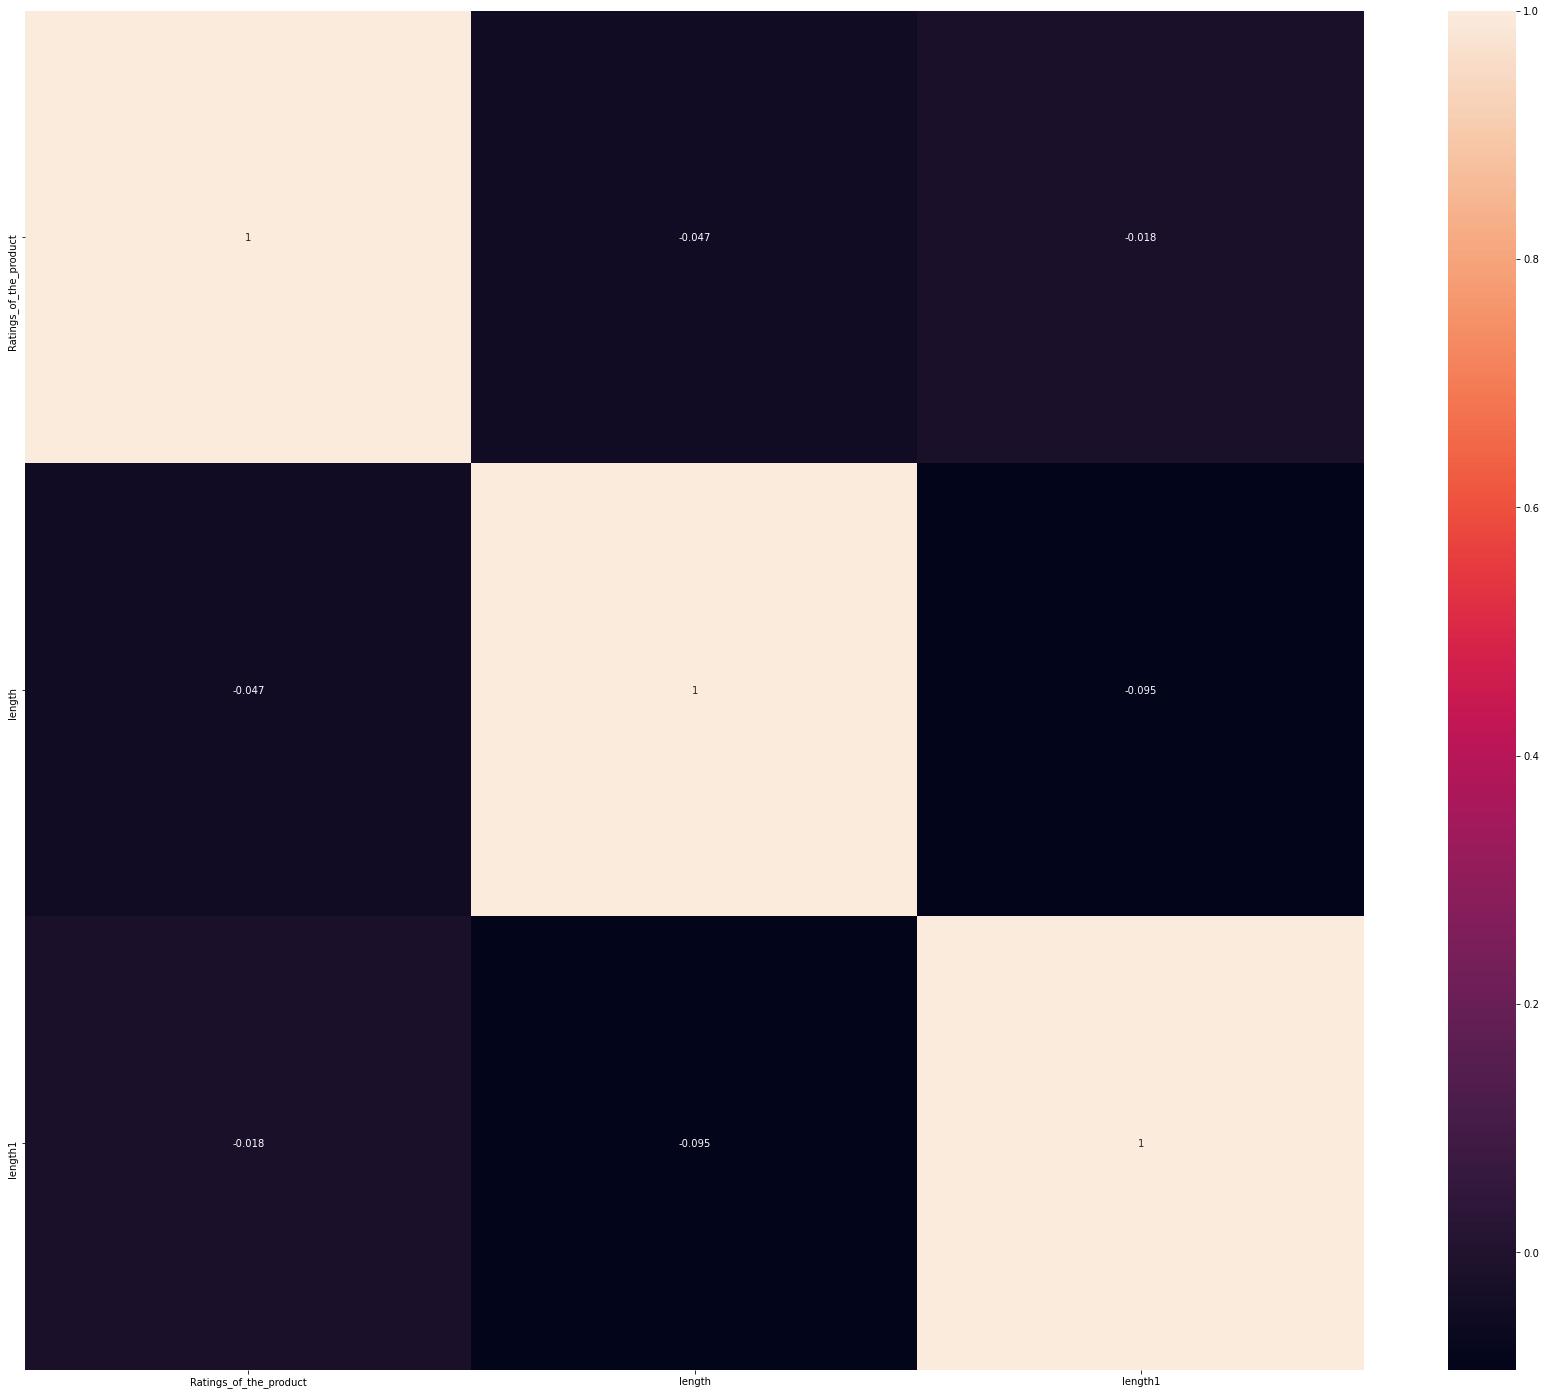

In [18]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# Removing Stopwords

In [19]:
import string
import nltk
from nltk.corpus import stopwords

In [20]:
stops = set(stopwords.words('english'))
print(stops)

{'be', 'shouldn', 'have', 'd', 'shan', 'won', 'over', 'very', 'with', 'its', 'we', 'were', 'of', 'about', 'through', 'am', 'above', 'below', 'didn', 'again', "she's", "that'll", "needn't", 'or', "shouldn't", 'then', 'couldn', 'they', 'his', 'you', "mustn't", 'because', 'y', 'can', 'myself', 'her', "isn't", 'are', "don't", 'don', 'our', 'hers', "doesn't", 'own', 'haven', 'mightn', 'but', 'did', 'more', "couldn't", 'and', 'into', "hasn't", 'other', 'them', 'in', 'doesn', "shan't", 'after', "you're", 'hasn', "mightn't", 'o', "wasn't", 'their', 'for', "wouldn't", 'themselves', 'than', 'these', 'out', 'was', 'my', 'now', 'itself', 'aren', 'yourselves', 'further', 'ma', 'a', 'who', 'this', 'here', 'nor', 'few', 'at', 'yourself', 'same', 'too', 'him', 'just', 'between', 'wasn', 'an', 'll', 'before', 'most', 'to', 'as', 'down', 'been', 'any', 'me', 'he', 'where', 'ain', 'up', 'does', 'being', 's', 'wouldn', 'm', "won't", 'had', "you'll", 'each', 'i', 'needn', 'both', 'theirs', 'ourselves', "yo

##### I have import stopwards that help me to identify all the common words which i can remove it fom comments columns.

In [21]:
df['clean_length'] = df.Full_review.str.len()
df['clean_length_1'] = df.Short_review.str.len()
df.head()

,Product,Ratings_of_the_product,Full_review,Short_review,length,length1,clean_length,clean_length_1
0,Professional Cameras,5,well reviewing this after using for almost one...,great product,177.0,13,177.0,13
1,Professional Cameras,5,worth more than the amount. best dslr for a go...,just wow!,133.0,9,133.0,9
2,Professional Cameras,5,product really great . i am totally sctified t...,excellent,245.0,9,245.0,9
3,Professional Cameras,4,the camera simply awesome..and it is a best bu...,worth the money,134.0,15,134.0,15
4,Professional Cameras,3,satisfied with the product.. its a really good...,does the job,128.0,12,128.0,12


In [22]:
# total Length Removal
print(df.length.sum())
print(df.length1.sum())
print(df.clean_length.sum())
print(df.clean_length_1.sum())

1180427.0
360026
1180427.0
360026


#### After Cleaning and Removal of all the features.

##### Using Distribution Plot after cleaning & before cleaning the features columns.

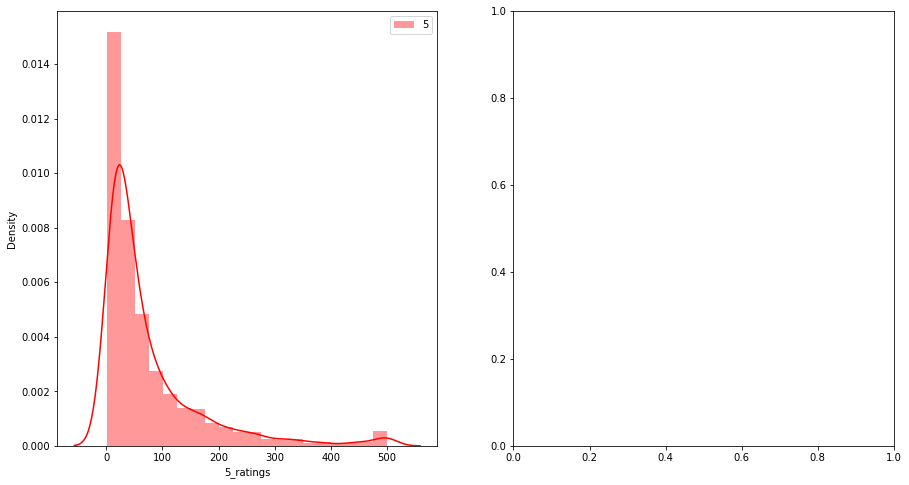

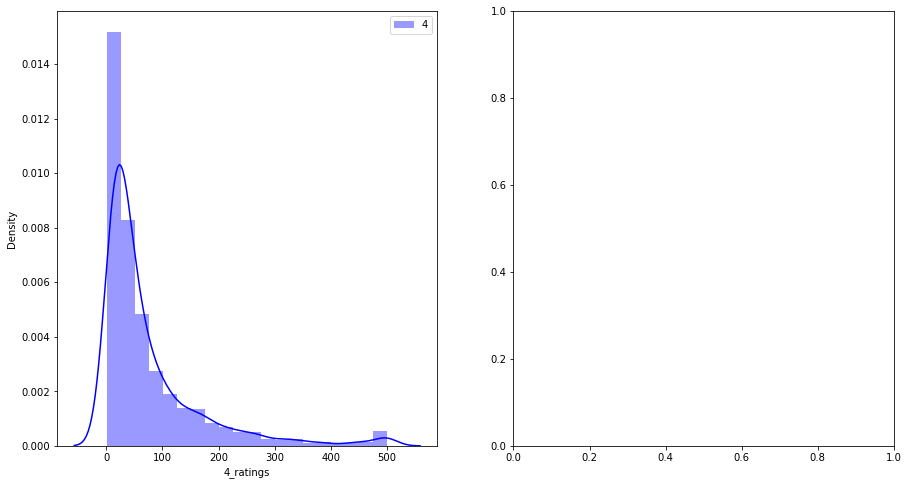

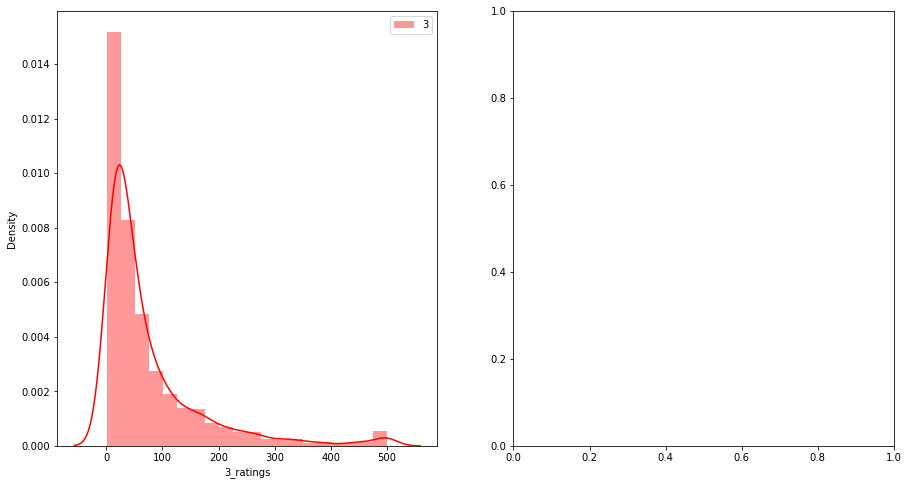

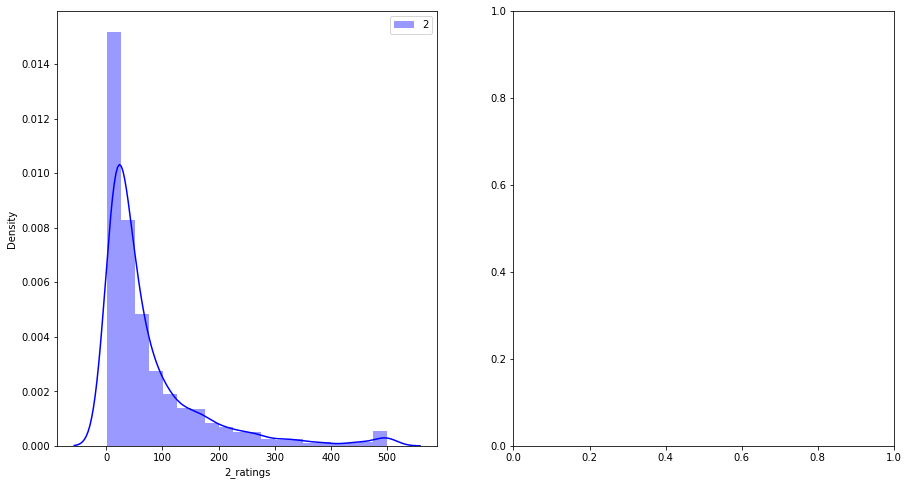

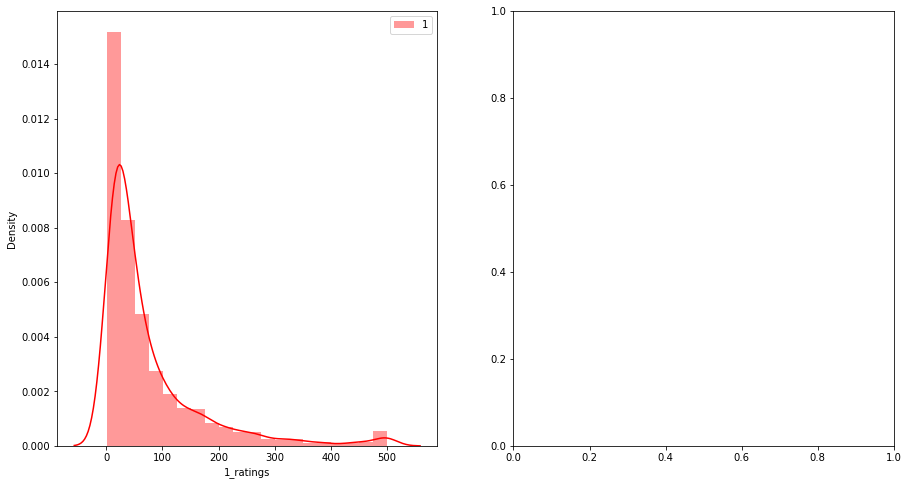

In [23]:
# Full_review before cleaning
f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length'], bins=20, ax=ax[0], label='5', color='r')

ax[0].set_xlabel('5_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length'], bins=20, ax=ax[0], label='4', color='b')

ax[0].set_xlabel('4_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length'], bins=20, ax=ax[0], label='3', color='r')

ax[0].set_xlabel('3_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length'], bins=20, ax=ax[0], label='2', color='b')

ax[0].set_xlabel('2_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length'], bins=20, ax=ax[0], label='1', color='r')

ax[0].set_xlabel('1_ratings')
ax[0].legend()

plt.show()

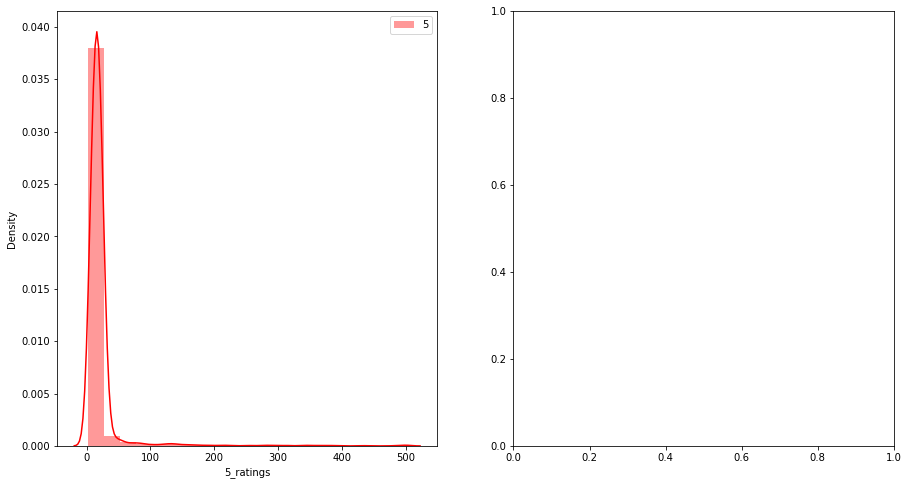

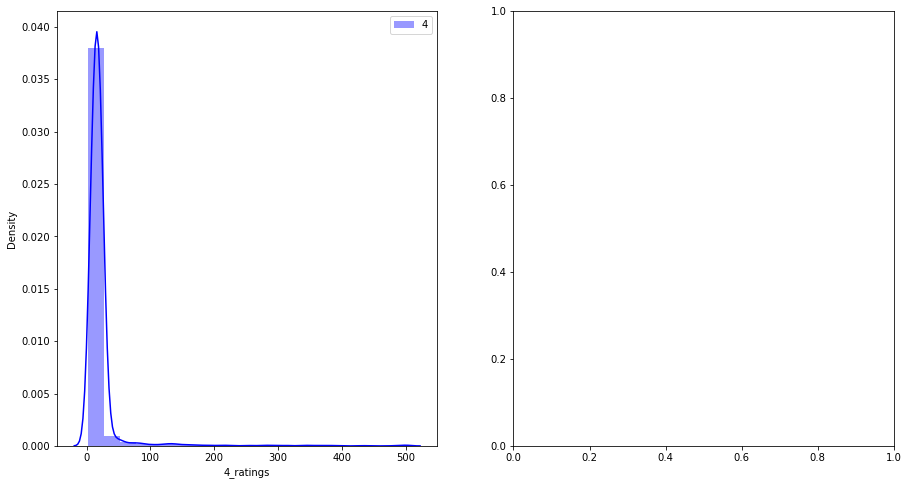

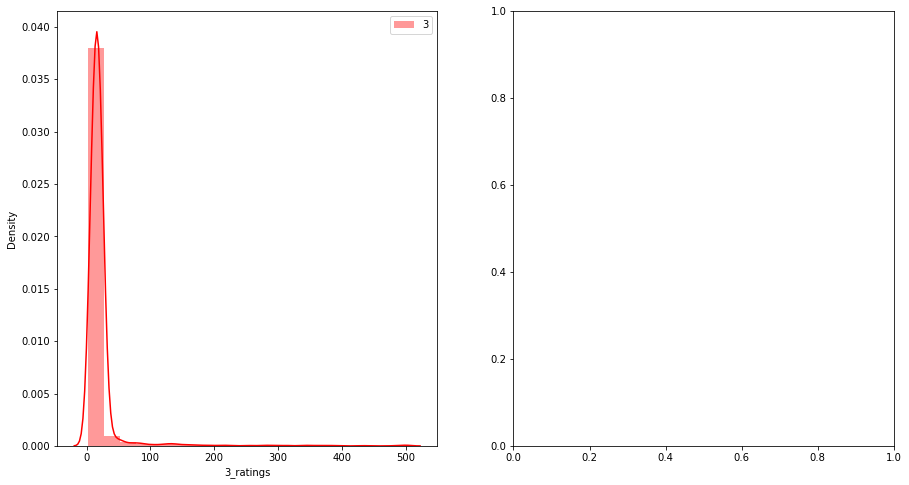

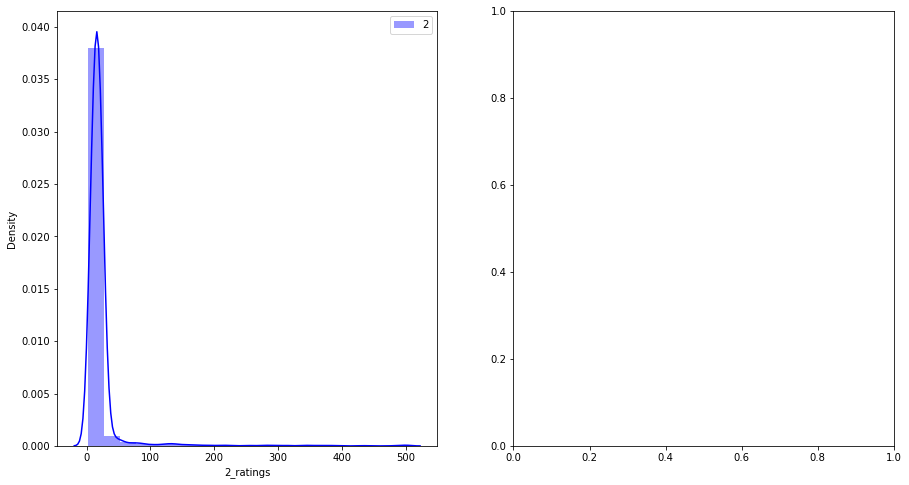

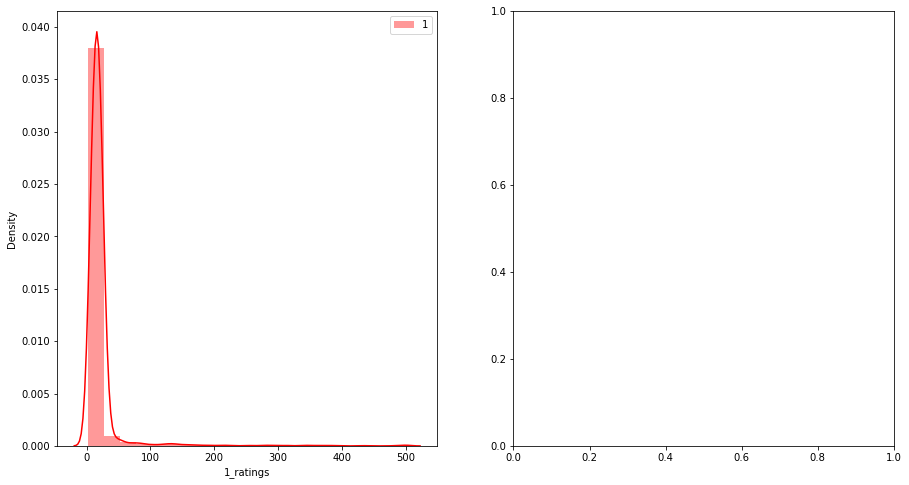

In [24]:
# Short_review before cleaning
f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length1'], bins=20, ax=ax[0], label='5', color='r')

ax[0].set_xlabel('5_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length1'], bins=20, ax=ax[0], label='4', color='b')

ax[0].set_xlabel('4_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length1'], bins=20, ax=ax[0], label='3', color='r')

ax[0].set_xlabel('3_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length1'], bins=20, ax=ax[0], label='2', color='b')

ax[0].set_xlabel('2_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['length1'], bins=20, ax=ax[0], label='1', color='r')

ax[0].set_xlabel('1_ratings')
ax[0].legend()

plt.show()

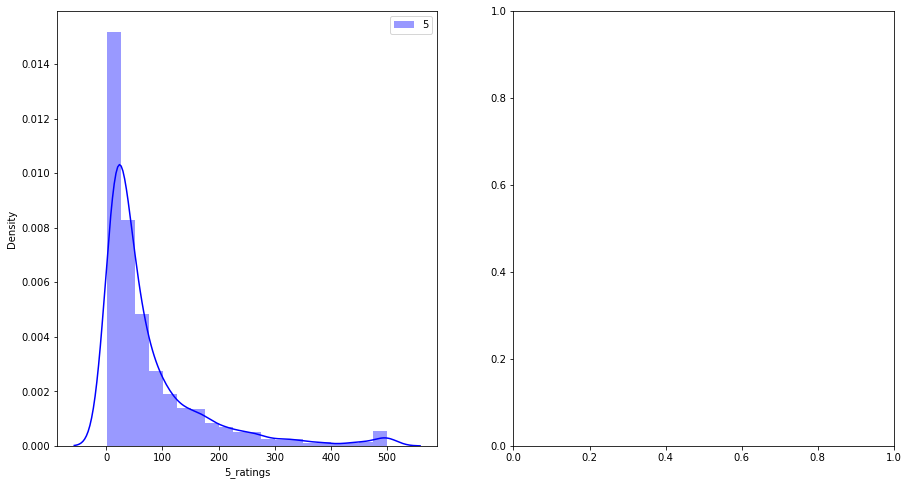

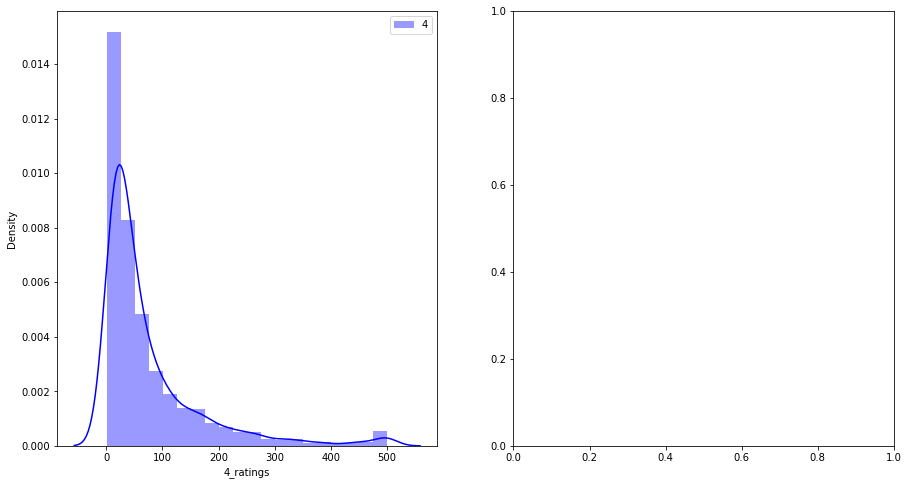

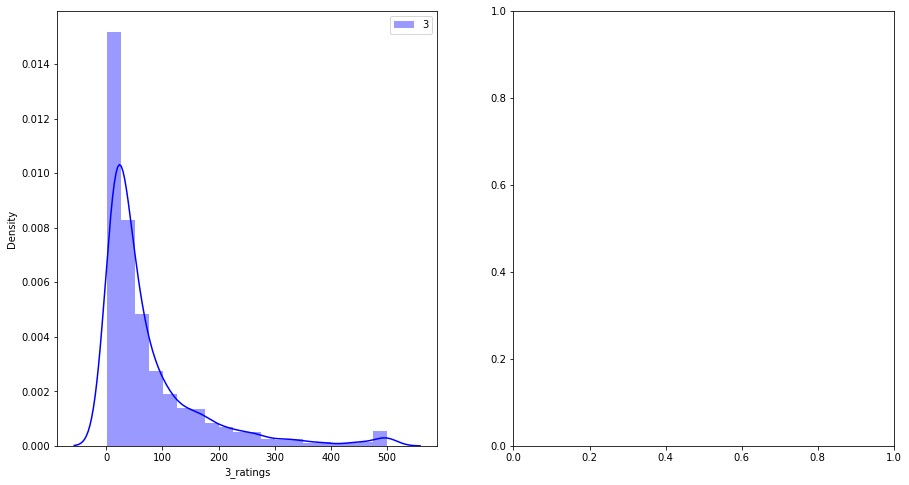

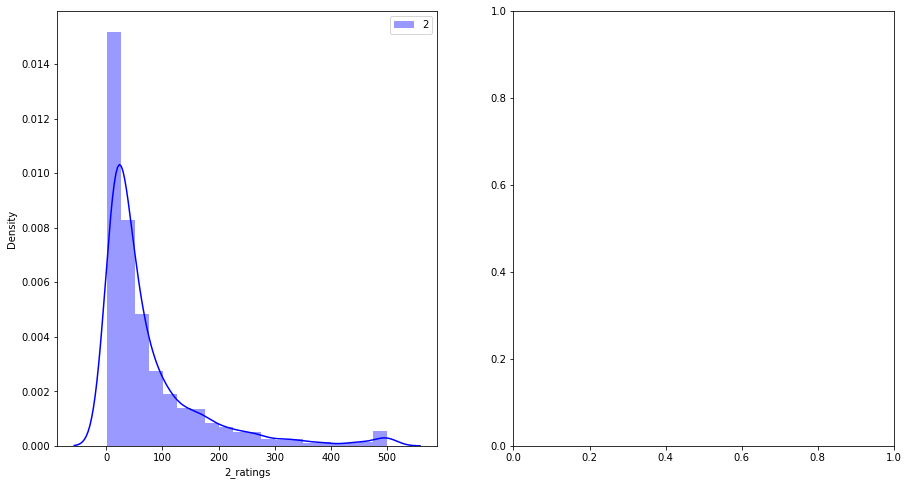

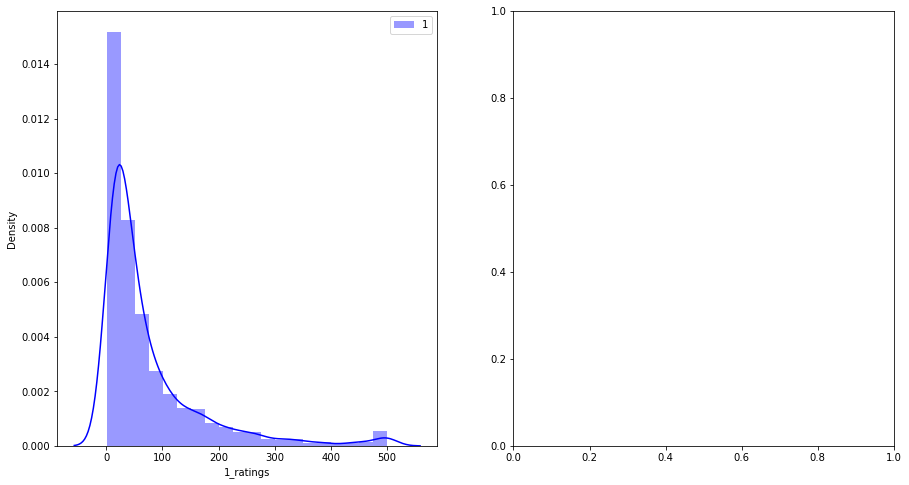

In [25]:
# Full_review after cleaning
f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length'], bins=20, ax=ax[0], label='5', color='b')

ax[0].set_xlabel('5_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length'], bins=20, ax=ax[0], label='4', color='b')

ax[0].set_xlabel('4_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length'], bins=20, ax=ax[0], label='3', color='b')

ax[0].set_xlabel('3_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length'], bins=20, ax=ax[0], label='2', color='b')

ax[0].set_xlabel('2_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length'], bins=20, ax=ax[0], label='1', color='b')

ax[0].set_xlabel('1_ratings')
ax[0].legend()

plt.show()

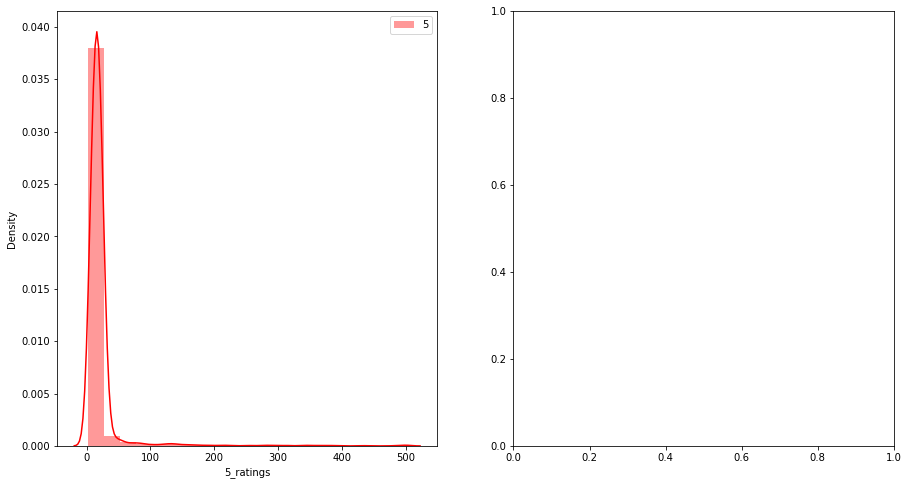

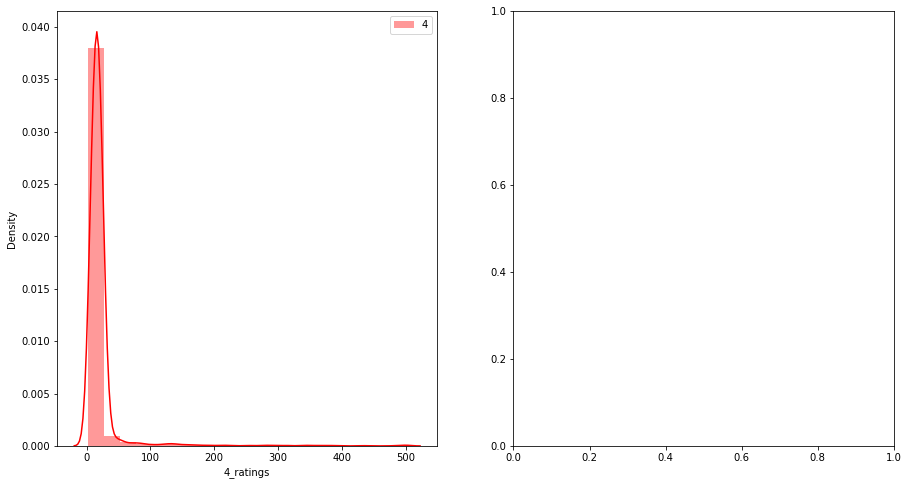

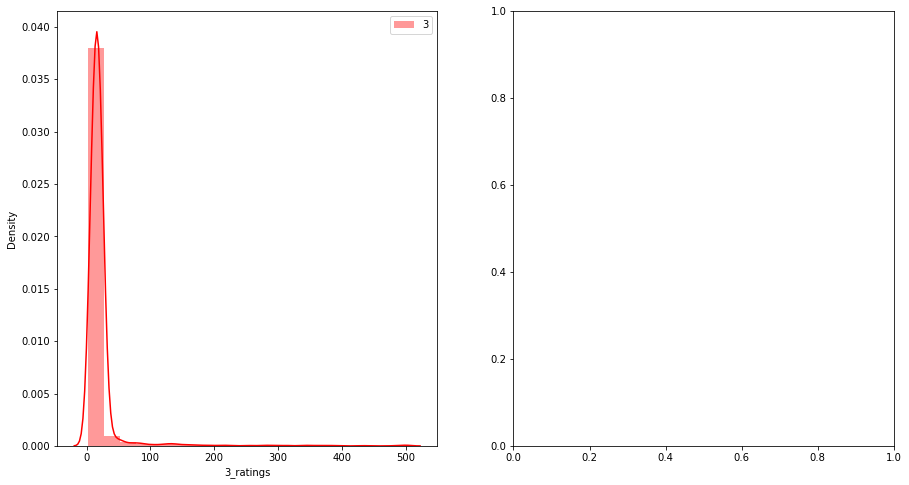

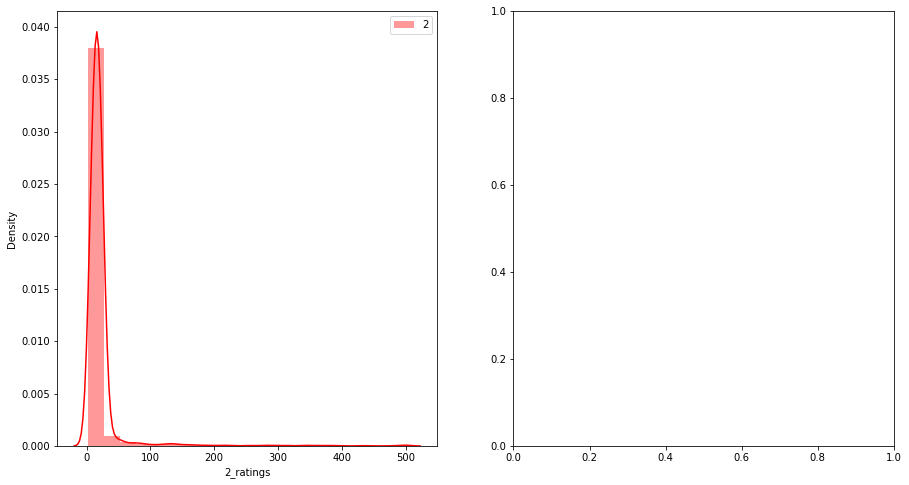

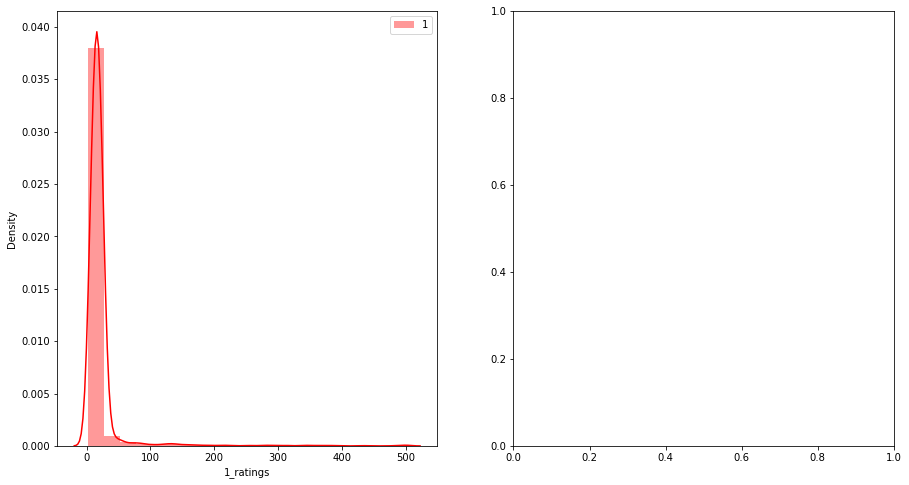

In [26]:
# Short_review after cleaning
f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length_1'], bins=20, ax=ax[0], label='5', color='r')

ax[0].set_xlabel('5_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length_1'], bins=20, ax=ax[0], label='4', color='r')

ax[0].set_xlabel('4_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length_1'], bins=20, ax=ax[0], label='3', color='r')

ax[0].set_xlabel('3_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length_1'], bins=20, ax=ax[0], label='2', color='r')

ax[0].set_xlabel('2_ratings')
ax[0].legend()

f, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df[df['Ratings_of_the_product'] == 1] ['clean_length_1'], bins=20, ax=ax[0], label='1', color='r')

ax[0].set_xlabel('1_ratings')
ax[0].legend()

plt.show()

In [27]:
!pip install wordcloud 

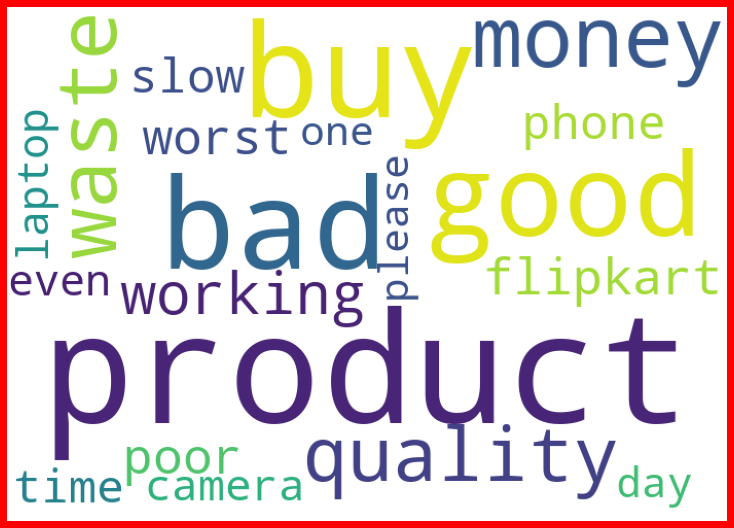

In [28]:
# getting sense of Full_review ratings 
from wordcloud import WordCloud
df = df['Full_review'][df['Ratings_of_the_product']==1]
df_cloud = WordCloud (width=700,height=500,background_color = 'white', max_words=20).generate(''.join(df))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(df_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### By using Word Cloud it shows numbers of words which are loud.

## PorterStemmer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(smooth_idf = False)
doc = ["Full_review"]
doc_vector = tfid.fit_transform(doc)
df = pd.DataFrame(doc_vector.todense(),columns=tfid.get_feature_names())
df

,full_review
0,1.0


#### I have used the PorterStemmer and WordNetLemmatizer in comment text columns so that i can minimize the numbers of words from the columns and get some meaningful information out of it.
#### It will also help us to improve the accuracy score.

## TfidfVectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(smooth_idf = False)
doc = ["Full_review","Short_review"]a
doc_vector = tfid.fit_transform(doc)
df = pd.DataFrame(doc_vector.todense(),columns=tfid.get_feature_names())
df

,full_review,short_review
0,1.0,0.0
1,0.0,1.0


#### Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.